In [1]:
import bmll2 as b2
b2.get_file('modules/auxiliary_functions.py')

'auxiliary_functions.py'

In [2]:
# can do this when i have converted the notebooks to .py files
# import auxiliary_functions
import auxiliary_functions as af

import random
import math
import pandas as pd
import numpy as np
from pandas import StringDtype

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LogFormatterSciNotation

In [3]:
%%time
b2.get_file('test_data/homo_4_immediate(100).csv')
impact_data = pd.read_csv('homo_4_immediate(100).csv', parse_dates = ['Date', 'Start time', 'End time'])
impact_data['Start time']    = pd.to_datetime(impact_data['Start time'], format = 'mixed')
impact_data['End time']      = pd.to_datetime(impact_data['End time'], format = 'mixed')
impact_data['duration(min)'] = ((impact_data['End time'] - impact_data['Start time']).dt.total_seconds() / 60).round(6)
# MTN has a weird glitch where we have negative values for volume traded. All these have a trade sign of 0 so need to be removed
# should probably do this in the processing stage but isnt a big deal here
impact_data = impact_data[impact_data['trade sign'] != 0]

# takes about 26 seconds to load (homo_4_immediate)
# takes about 2 minutes to load

CPU times: user 1min 51s, sys: 22.5 s, total: 2min 14s
Wall time: 2min 15s


In [4]:
x_meta = impact_data['volume traded'] / impact_data['daily volume']
impact_data[impact_data['volume traded'] < 0]
impact_data.head()

,RIC,Date,Start time,End time,daily volume,intraday volatility,number child orders,volume traded,trade sign,impact(shortfall),impact(ave per trade),impact(simple),20 AD volume,20 AD volatility,duration(min)
0,LAB,2023-01-03,2023-01-03 16:30:54.847302,2023-01-03 16:30:54.847345,542839.0,0.000000,2,3978.0,1,0.051293,0.0,0.0,542839.0,0.000000,0.000001
1,LAB,2023-01-03,2023-01-03 09:53:18.937258,2023-01-03 10:33:16.415310,542839.0,0.000000,2,73068.0,1,0.051293,0.0,0.0,542839.0,0.000000,39.957968
2,LAB,2023-01-03,2023-01-03 16:01:00.740320,2023-01-03 16:02:34.049924,542839.0,0.000000,2,3689.0,1,0.051293,0.0,0.0,542839.0,0.000000,1.555160
3,LAB,2023-01-04,2023-01-04 10:35:29.288548,2023-01-04 10:35:29.288631,608134.0,0.105263,3,160276.0,-1,NaN,-0.0,NaN,575486.5,0.052632,0.000001
4,LAB,2023-01-05,2023-01-05 13:15:31.219025,2023-01-05 15:26:37.381220,704992.0,0.000000,2,49000.0,1,0.051293,0.0,0.0,618655.0,0.035088,131.102703


In [14]:
n_intervals = 40

#buys  = impact_data[impact_data['trade sign'] == 1] 
#sells = impact_data[impact_data['trade sign'] == -1] 

#x_meta = impact_data['volume traded'] / impact_data['daily volume']
#y_meta = impact_data['impact(simple)'] / impact_data['intraday volatility']

x_meta = impact_data['volume traded'] / impact_data['20 AD volume']
y_meta = impact_data['impact(simple)'] / impact_data['20 AD volatility']

bins_meta           = np.logspace(np.log10(x_meta.min()), np.log10(x_meta.max()), n_intervals, base = 10, endpoint = True)
x_bins_meta         = pd.cut(x_meta, bins = bins_meta) 

y_bins_vals_meta    = y_meta.groupby(x_bins_meta, observed = False).mean()
x_bins_centers_meta = [interval.mid for interval in y_bins_vals_meta.index.categories]

alpha          = 0.5
sqrt_law       = alpha * np.sqrt(x_bins_centers_meta)

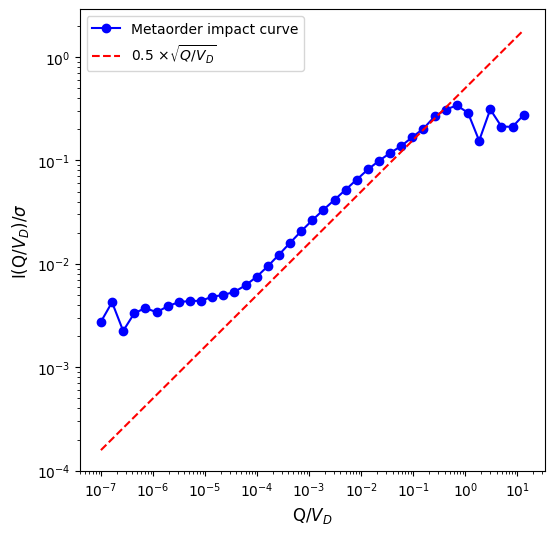

In [15]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(x_bins_centers_meta, y_bins_vals_meta, marker = 'o', color = 'blue', label = 'Metaorder impact curve')
ax.plot(x_bins_centers_meta, sqrt_law, linestyle = '--', color = 'red', label = r'0.5 $\times \sqrt{Q/V_{D}}$')

ax.set_xlabel(r'Q/$V_{D}$', fontsize = 12)
ax.set_ylabel(r'I(Q/$V_{D}$)/$\sigma$', fontsize = 12)

# force scientific notation 10^n ticks
ax.xaxis.set_major_formatter(LogFormatterSciNotation(labelOnlyBase = False))
ax.yaxis.set_major_formatter(LogFormatterSciNotation(labelOnlyBase = False))

plt.legend()

plt.savefig('top_100_impact_curve(20ADV).pdf')
b2.put_file('top_100_impact_curve(20ADV).pdf', 'figures')
b2.get_file('figures/top_100_impact_curve(20ADV).pdf')

plt.show()

In [22]:
impact_data['RIC'].unique()

array(['LAB', 'PPH', 'FSR', 'OMU', 'WHL', 'SSW', 'FTB', 'ORN', 'PAN',
       'GLN', 'PIK', 'RDF', 'OUT', 'SOL', 'GRT', 'MTN', 'IMP', 'LHC',
       'SAP', 'SLM', 'SAC', 'TRU', 'OPA', 'SBK', 'ABG', 'VKE', 'NTC',
       'CPR', 'SSU', 'DRD', 'KP2', 'HAR', 'MTM', 'KAP', 'DCP', 'N91',
       'DSY', 'GFI', 'APN', 'NPH', 'DIB', 'MDI', 'NPN', 'AEL', 'SHP',
       'GND', 'CCD', 'QLT', 'CML', 'PPC', 'VAL', 'INL', 'INP', 'MRP',
       'JBL', 'BLU', 'NED', 'S32', 'TFG', 'VOD', 'NRP', 'BYI', 'NY1',
       'REM', 'KST', 'MNP', 'BVT', 'FFB', 'ACL', 'ANG', 'BTI', 'SRE',
       'CLS', 'ITE', 'PRX', 'ARI', 'RBO', 'SPG', 'WBC', 'LTE', 'SSS',
       'AGL', 'BID', 'PPE', 'AFT', 'TKG', 'EQU', 'YRK', 'MSP', 'TGA',
       'AEG', 'OMN', 'BTN', 'AFE', 'AVI', 'EXX', 'RNI', 'BHG', 'BOX',
       'ANH'], dtype=object)

In [7]:
GRT = impact_data[impact_data['RIC'] == 'GRT']
OMU = impact_data[impact_data['RIC'] == 'OMU']
RMH = impact_data[impact_data['RIC'] == 'RMH']
MTN = impact_data[impact_data['RIC'] == 'MTN']
ABG = impact_data[impact_data['RIC'] == 'ABG']
GFI = impact_data[impact_data['RIC'] == 'GFI']
SHP = impact_data[impact_data['RIC'] == 'SHP']
AGL = impact_data[impact_data['RIC'] == 'AGL']
MNP = impact_data[impact_data['RIC'] == 'MNP']
RNI = impact_data[impact_data['RIC'] == 'RNI']


In [8]:
impact_data.iloc[10000:100010]

,RIC,Date,Start time,End time,daily volume,intraday volatility,number child orders,volume traded,trade sign,impact(shortfall),impact(ave per trade),impact(simple),20 AD volume,20 AD volatility,duration(min)
10236,PPH,2023-02-08,2023-02-08 13:48:38.211469,2023-02-08 13:52:38.132149,8766523.0,0.029471,4,17213.0,1,0.001555,0.000037,0.000508,5641637.05,0.027031,3.998678
10237,PPH,2023-02-08,2023-02-08 13:52:41.989188,2023-02-08 13:54:43.906300,8766523.0,0.029471,12,46265.0,1,0.000656,0.000255,0.000508,5641637.05,0.027031,2.031952
10238,PPH,2023-02-08,2023-02-08 13:58:45.900192,2023-02-08 13:59:06.204058,8766523.0,0.029471,3,6930.0,-1,0.000582,0.000226,0.000762,5641637.05,0.027031,0.338398
10239,PPH,2023-02-08,2023-02-08 14:06:43.446394,2023-02-08 14:10:07.454180,8766523.0,0.029471,2,7072.0,1,0.001271,0.000000,0.000509,5641637.05,0.027031,3.400130
10240,PPH,2023-02-08,2023-02-08 14:11:53.012540,2023-02-08 14:12:16.633755,8766523.0,0.029471,2,7815.0,-1,0.000763,0.000247,0.000763,5641637.05,0.027031,0.393687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102975,PPH,2023-12-20,2023-12-20 12:06:01.777759,2023-12-20 12:06:01.777994,2804987.0,0.026604,2,727.0,1,0.000524,0.000786,0.000786,4876815.10,0.033470,0.000004
102976,PPH,2023-12-20,2023-12-20 12:08:59.669957,2023-12-20 12:14:59.562141,2804987.0,0.026604,2,45.0,-1,0.000262,0.000233,0.000524,4876815.10,0.033470,5.998203
102977,PPH,2023-12-20,2023-12-20 12:21:12.967387,2023-12-20 12:21:12.967451,2804987.0,0.026604,2,119.0,1,0.000524,0.000000,0.000000,4876815.10,0.033470,0.000001
102978,PPH,2023-12-20,2023-12-20 12:26:39.859953,2023-12-20 12:26:39.859995,2804987.0,0.026604,2,3.0,1,0.000524,0.000000,0.000000,4876815.10,0.033470,0.000001


In [9]:
n_intervals = 40
bins        = np.logspace(-6, 0, n_intervals, base = 10, endpoint = True)

In [10]:
x_GRT = GRT['volume traded'] / GRT['20 AD volume']
y_GRT = GRT['impact(simple)'] / GRT['20 AD volatility']

#bins_GRT           = np.logspace(np.log10(x_GRT.min()), np.log10(x_GRT.max()), n_intervals, base = 10, endpoint = True)
x_bins_GRT         = pd.cut(x_GRT, bins = bins) 

y_bins_vals_GRT    = y_GRT.groupby(x_bins_GRT, observed = False).mean()
x_bins_centers_GRT = [interval.mid for interval in y_bins_vals_GRT.index.categories]

In [9]:
x_OMU = OMU['volume traded'] / OMU['daily volume']
y_OMU = OMU['impact(simple)'] / OMU['intraday volatility']

#bins_OMU           = np.logspace(np.log10(x_OMU.min()), np.log10(x_OMU.max()), n_intervals, base = 10, endpoint = True)
x_bins_OMU         = pd.cut(x_OMU, bins = bins) 

y_bins_vals_OMU    = y_OMU.groupby(x_bins_OMU, observed = False).mean()
x_bins_centers_OMU = [interval.mid for interval in y_bins_vals_OMU.index.categories]

In [10]:
x_RMH = RMH['volume traded'] / RMH['daily volume']
y_RMH = RMH['impact(simple)'] / RMH['intraday volatility']

#bins_RMH           = np.logspace(np.log10(x_RMH.min()), np.log10(x_RMH.max()), n_intervals, base = 10, endpoint = True)
x_bins_RMH         = pd.cut(x_RMH, bins = bins) 

y_bins_vals_RMH    = y_RMH.groupby(x_bins_RMH, observed = False).mean()
x_bins_centers_RMH = [interval.mid for interval in y_bins_vals_RMH.index.categories]

In [11]:
x_MTN = MTN['volume traded'] / MTN['daily volume']
y_MTN = MTN['impact(simple)'] / MTN['intraday volatility']

#bins_MTN           = np.logspace(np.log10(x_MTN.min()), np.log10(x_MTN.max()), n_intervals, base = 10, endpoint = True)
x_bins_MTN         = pd.cut(x_MTN, bins = bins) 

y_bins_vals_MTN    = y_MTN.groupby(x_bins_MTN, observed = False).mean()
x_bins_centers_MTN = [interval.mid for interval in y_bins_vals_MTN.index.categories]

In [12]:
x_ABG = ABG['volume traded'] / ABG['daily volume']
y_ABG = ABG['impact(simple)'] / ABG['intraday volatility']

#bins_ABG           = np.logspace(np.log10(x_ABG.min()), np.log10(x_ABG.max()), n_intervals, base = 10, endpoint = True)
x_bins_ABG         = pd.cut(x_ABG, bins = bins) 

y_bins_vals_ABG    = y_ABG.groupby(x_bins_ABG, observed = False).mean()
x_bins_centers_ABG = [interval.mid for interval in y_bins_vals_ABG.index.categories]

In [11]:
x_GFI = GFI['volume traded'] / GFI['20 AD volume']
y_GFI = GFI['impact(simple)'] / GFI['20 AD volatility']

#bins_GFI           = np.logspace(np.log10(x_GFI.min()), np.log10(x_GFI.max()), n_intervals, base = 10, endpoint = True)
x_bins_GFI         = pd.cut(x_GFI, bins = bins) 

y_bins_vals_GFI    = y_GFI.groupby(x_bins_GFI, observed = False).mean()
x_bins_centers_GFI = [interval.mid for interval in y_bins_vals_GFI.index.categories]

In [14]:
x_SHP = SHP['volume traded'] / SHP['daily volume']
y_SHP = SHP['impact(simple)'] / SHP['intraday volatility']

#bins_SHP           = np.logspace(np.log10(x_SHP.min()), np.log10(x_SHP.max()), n_intervals, base = 10, endpoint = True)
x_bins_SHP         = pd.cut(x_SHP, bins = bins) 

y_bins_vals_SHP    = y_SHP.groupby(x_bins_SHP, observed = False).mean()
x_bins_centers_SHP = [interval.mid for interval in y_bins_vals_SHP.index.categories]

In [15]:
x_AGL = AGL['volume traded'] / AGL['daily volume']
y_AGL = AGL['impact(simple)'] / AGL['intraday volatility']

#bins_AGL           = np.logspace(np.log10(x_AGL.min()), np.log10(x_AGL.max()), n_intervals, base = 10, endpoint = True)
x_bins_AGL         = pd.cut(x_AGL, bins = bins) 

y_bins_vals_AGL    = y_AGL.groupby(x_bins_AGL, observed = False).mean()
x_bins_centers_AGL = [interval.mid for interval in y_bins_vals_AGL.index.categories]

In [16]:
x_MNP = MNP['volume traded'] / MNP['daily volume']
y_MNP = MNP['impact(simple)'] / MNP['intraday volatility']

#bins_MNP           = np.logspace(np.log10(x_MNP.min()), np.log10(x_MNP.max()), n_intervals, base = 10, endpoint = True)
x_bins_MNP         = pd.cut(x_MNP, bins = bins) 

y_bins_vals_MNP    = y_MNP.groupby(x_bins_MNP, observed = False).mean()
x_bins_centers_MNP = [interval.mid for interval in y_bins_vals_MNP.index.categories]

In [17]:
x_RNI = RNI['volume traded'] / RNI['daily volume']
y_RNI = RNI['impact(simple)'] / RNI['intraday volatility']

#bins_RNI           = np.logspace(np.log10(x_RNI.min()), np.log10(x_RNI.max()), n_intervals, base = 10, endpoint = True)
x_bins_RNI         = pd.cut(x_RNI, bins = bins) 

y_bins_vals_RNI    = y_RNI.groupby(x_bins_RNI, observed = False).mean()
x_bins_centers_RNI = [interval.mid for interval in y_bins_vals_RNI.index.categories]

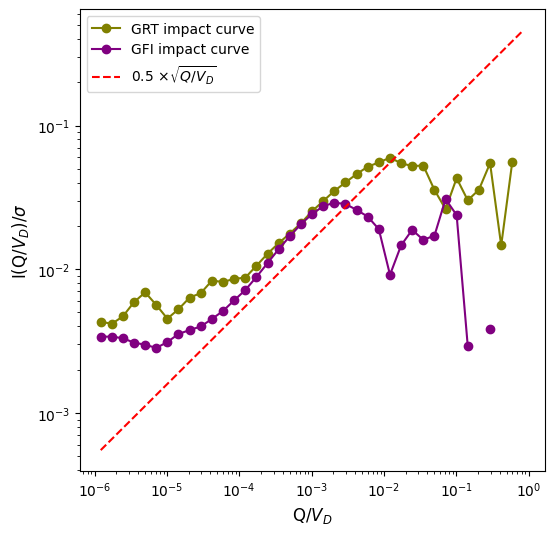

In [13]:
#array(['GRT', 'OMU', 'RMH', 'MTN', 'ABG', 'GFI', 'SHP', 'AGL', 'MNP',
#       'RNI'], dtype=object)

alpha       = 0.5
sqrt_law    = alpha * np.sqrt(x_bins_centers_GRT)

fig, ax = plt.subplots(figsize = (6, 6))

#ax.set_title('Recovering the square root law', fontsize = 14)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(x_bins_centers_GRT, y_bins_vals_GRT, marker = 'o', color = 'olive', label = 'GRT impact curve')
#ax.plot(x_bins_centers_OMU, y_bins_vals_OMU, marker = 'o', color = 'orange', label = 'OMU impact curve')
#ax.plot(x_bins_centers_RMH, y_bins_vals_RMH, marker = 'o', color = 'green', label = 'RMH impact curve')
#ax.plot(x_bins_centers_MTN, y_bins_vals_MTN, marker = 'o', color = 'yellow', label = 'MTN impact curve')
#ax.plot(x_bins_centers_ABG, y_bins_vals_ABG, marker = 'o', color = 'purple', label = 'ABG impact curve')
ax.plot(x_bins_centers_GFI, y_bins_vals_GFI, marker = 'o', color = 'purple', label = 'GFI impact curve')
#ax.plot(x_bins_centers_SHP, y_bins_vals_SHP, marker = 'o', color = 'cyan', label = 'SHP impact curve')
#ax.plot(x_bins_centers_AGL, y_bins_vals_AGL, marker = 'o', color = 'brown', label = 'AGL impact curve')
#ax.plot(x_bins_centers_MNP, y_bins_vals_MNP, marker = 'o', color = 'gray', label = 'MNP impact curve')
#ax.plot(x_bins_centers_RNI, y_bins_vals_RNI, marker = 'o', color = 'olive', label = 'RNI impact curve')
ax.plot(x_bins_centers_GRT, sqrt_law, linestyle = '--', color = 'red', label = r'0.5 $\times \sqrt{Q/V_{D}}$') # SQL

ax.set_xlabel(r'Q/$V_{D}$', fontsize = 12)
ax.set_ylabel(r'I(Q/$V_{D}$)/$\sigma$', fontsize = 12)

# force scientific notation 10^n ticks
ax.xaxis.set_major_formatter(LogFormatterSciNotation(labelOnlyBase = False))
ax.yaxis.set_major_formatter(LogFormatterSciNotation(labelOnlyBase = False))

plt.legend()
#ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), ncol = 3, fontsize = 8, frameon = False)

plt.savefig('GRT_GFI_impact_curve(20ADV).pdf')
b2.put_file('GRT_GFI_impact_curve(20ADV).pdf', 'figures')
b2.get_file('figures/GRT_GFI_impact_curve(20ADV).pdf')

plt.show()